<a href="https://colab.research.google.com/github/sumeyrarman1/phd_analyze/blob/main/sensor_tt_colab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Google Colab Uyumlu Sensör Travel Time Analizi
Bu defterle `.xlsx` dosyanı yükleyip 10 dakikalık ortalama travel time grafiklerini görebilirsin.

In [1]:

# Excel dosyasını Colab'a yüklemek için
from google.colab import files
uploaded = files.upload()


Saving 16122024_8BT.xlsx to 16122024_8BT.xlsx


In [2]:

# Yüklenen Excel dosyasını oku
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['16122024_8BT.xlsx']))


<ipython-input-3-d8ab1203e193>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timef'].dt.date
<ipython-input-3-d8ab1203e193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['timef'].dt.weekday
<ipython-input-3-d8ab1203e193>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

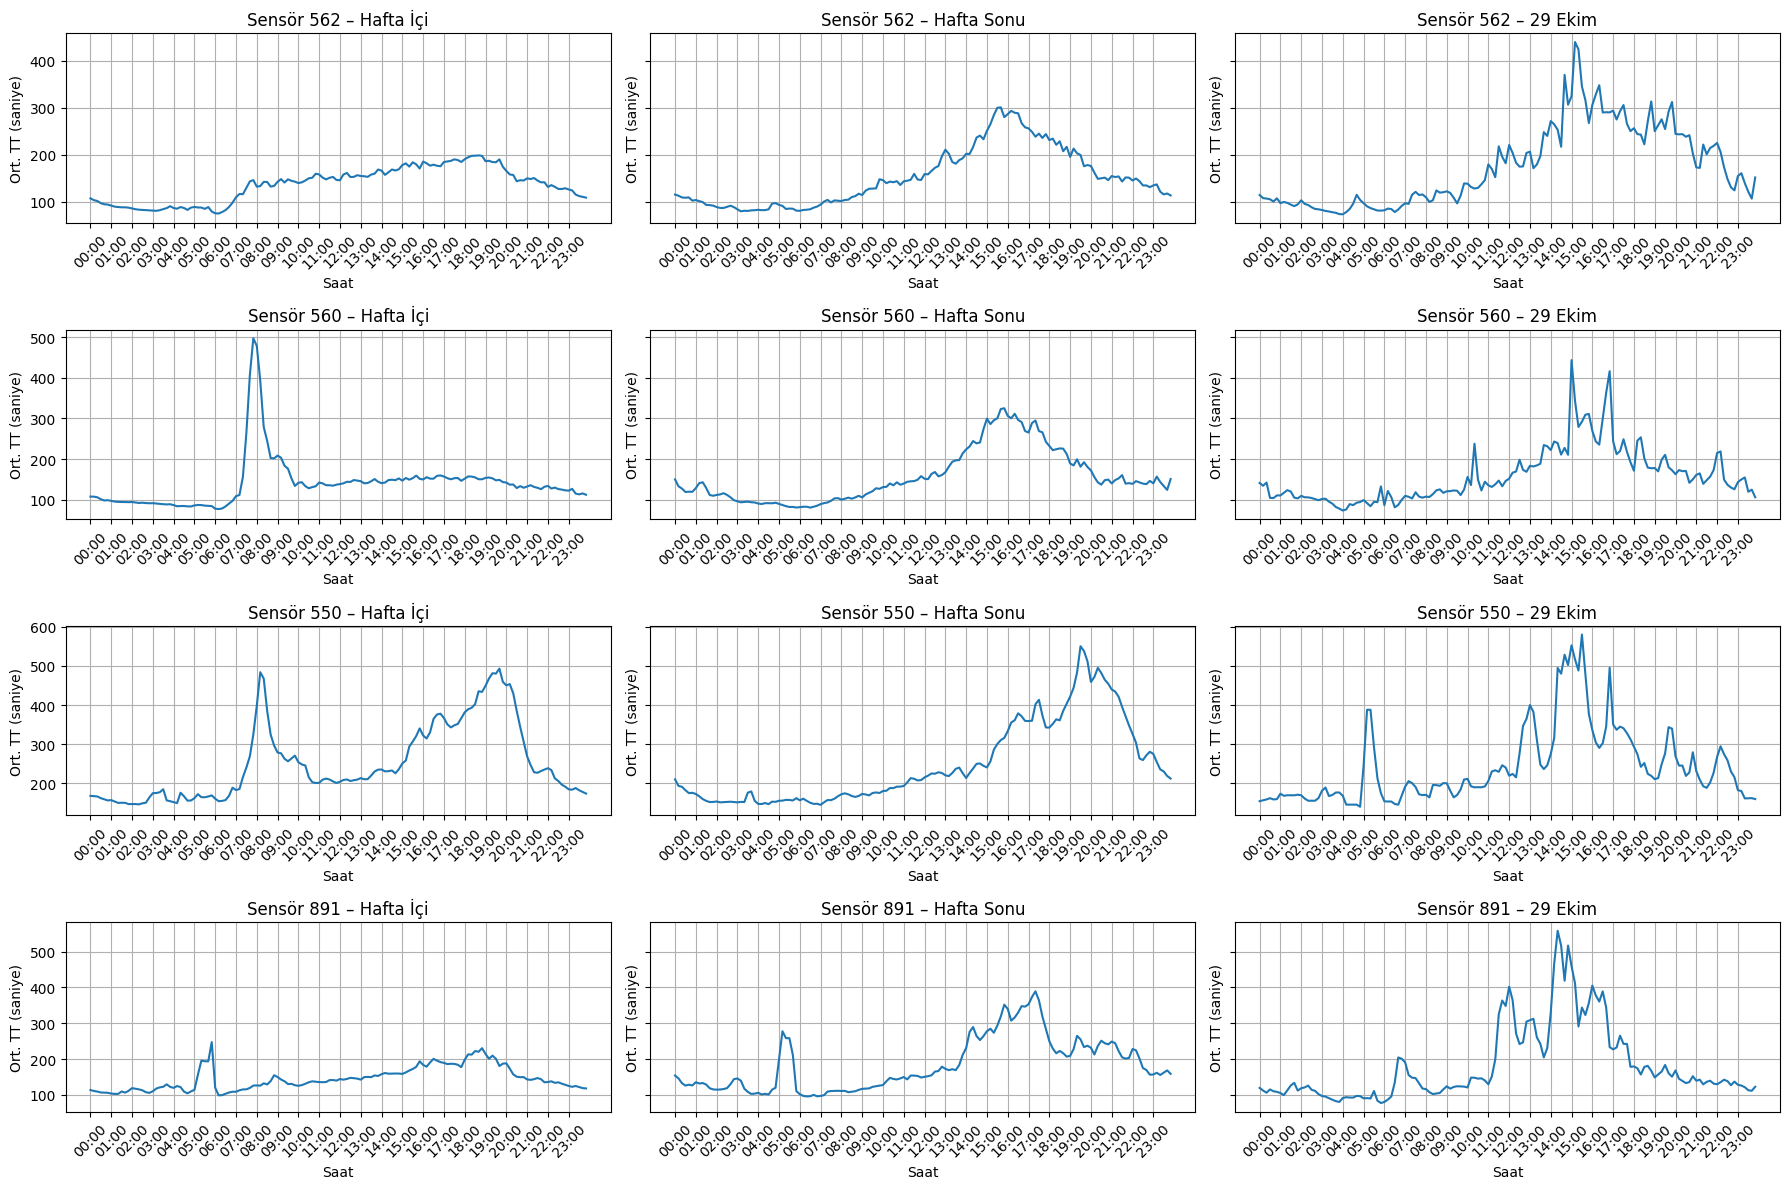

In [3]:

import matplotlib.pyplot as plt

# Veriyi filtrele ve ön işle
df['timef'] = pd.to_datetime(df['timef'])
df = df[df['idvct'].isin([562, 560, 550, 891])]

df['date'] = df['timef'].dt.date
df['weekday'] = df['timef'].dt.weekday
df['day_type'] = df['weekday'].apply(lambda x: 'Hafta İçi' if x < 5 else 'Hafta Sonu')
df['day_label'] = df['day_type']
df.loc[df['date'] == pd.to_datetime("2019-10-29").date(), 'day_label'] = '29 Ekim'
df['time_10min'] = df['timef'].dt.floor('10T')

sensor_ids = [562, 560, 550, 891]
day_labels = ['Hafta İçi', 'Hafta Sonu', '29 Ekim']

# Grafik çizimi
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12), sharey='row')
axes = axes.flatten()
plot_index = 0

for sensor_id in sensor_ids:
    for day in day_labels:
        df_day = df[(df['idvct'] == sensor_id) & (df['day_label'] == day)].copy()
        avg_10min = df_day.groupby(df_day['time_10min'].dt.time)['traveltime'].mean()

        x_labels = [t.strftime('%H:%M') for t in avg_10min.index]
        x_ticks = range(0, len(x_labels), 6)

        axes[plot_index].plot(x_labels, avg_10min.values)
        axes[plot_index].set_title(f"Sensör {sensor_id} – {day}")
        axes[plot_index].set_xlabel("Saat")
        axes[plot_index].set_ylabel("Ort. TT (saniye)")
        axes[plot_index].set_xticks(x_ticks)
        axes[plot_index].set_xticklabels([x_labels[i] for i in x_ticks], rotation=45)
        axes[plot_index].grid(True)
        plot_index += 1

plt.tight_layout()
plt.show()
